In [ ]:
import pandas as pd
import numpy as np

# Load the Apple stock data
apple_stock_data = pd.read_csv('/content/sample_data/AAPL (1).csv')

# Clean the dataset by removing NaN values
apple_stock_data_clean = apple_stock_data.dropna(subset=['Close'])

# Convert Close column to numeric, coercing errors to NaN and then dropping them
apple_stock_data_clean['Close'] = pd.to_numeric(apple_stock_data_clean['Close'], errors='coerce')
apple_stock_data_clean = apple_stock_data_clean.dropna(subset=['Close'])

try:
    # Calculate the mean
    mean = np.mean(apple_stock_data_clean['Close'])
    print(f'Mean: {mean:.4f}')

    # Calculate the median
    median = np.median(apple_stock_data_clean['Close'])
    print(f'Median: {median:.4f}')

    # Calculate the mode using pandas
    mode = apple_stock_data_clean['Close'].mode()[0]
    print(f'Mode: {mode:.4f}')

    # Calculate the standard deviation
    std_dev = np.std(apple_stock_data_clean['Close'])
    print(f'Standard Deviation: {std_dev:.4f}')

    # Print information about data cleaning
    print(f"\nOriginal number of records: {len(apple_stock_data)}")
    print(f"Number of records after cleaning: {len(apple_stock_data_clean)}")
    print(f"Number of records removed: {len(apple_stock_data) - len(apple_stock_data_clean)}")

except Exception as e:
    print(f"An error occurred: {str(e)}")

# Display first few rows of cleaned data
print("\nFirst few rows of cleaned data:")
print(apple_stock_data_clean.head())

Mean: 9.0189
Median: 0.4375
Mode: 0.3996
Standard Deviation: 16.8675

Original number of records: 10016
Number of records after cleaning: 10015
Number of records removed: 1

First few rows of cleaned data:
         Date      Open      High       Low     Close  Adj Close       Volume
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.101261  469033600.0
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.095978  175884800.0
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.088934  105728000.0
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.091135   86441600.0
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.093777   73449600.0


<ipython-input-5-143d2ac4f0ca>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_stock_data_clean['Close'] = pd.to_numeric(apple_stock_data_clean['Close'], errors='coerce')


--- Data Loading and Basic Exploration ---

First 5 rows:
   Comments  Shares  Views  User_Followers  User_Following  User_Likes
0       200     400  70000            2000             500        6000
1       180     210  50000            1500             350        4000

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Comments        2 non-null      int64
 1   Shares          2 non-null      int64
 2   Views           2 non-null      int64
 3   User_Followers  2 non-null      int64
 4   User_Following  2 non-null      int64
 5   User_Likes      2 non-null      int64
dtypes: int64(6)
memory usage: 224.0 bytes
None

Basic Statistics:
         Comments      Shares         Views  User_Followers  User_Following  \
count    2.000000    2.000000      2.000000        2.000000        2.000000   
mean   190.000000  305.000000  60000.000000  

<ipython-input-9-c581dea2aa3d>:75: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  performance_stats = df.groupby('Performance_Category').agg({


<Axes: >

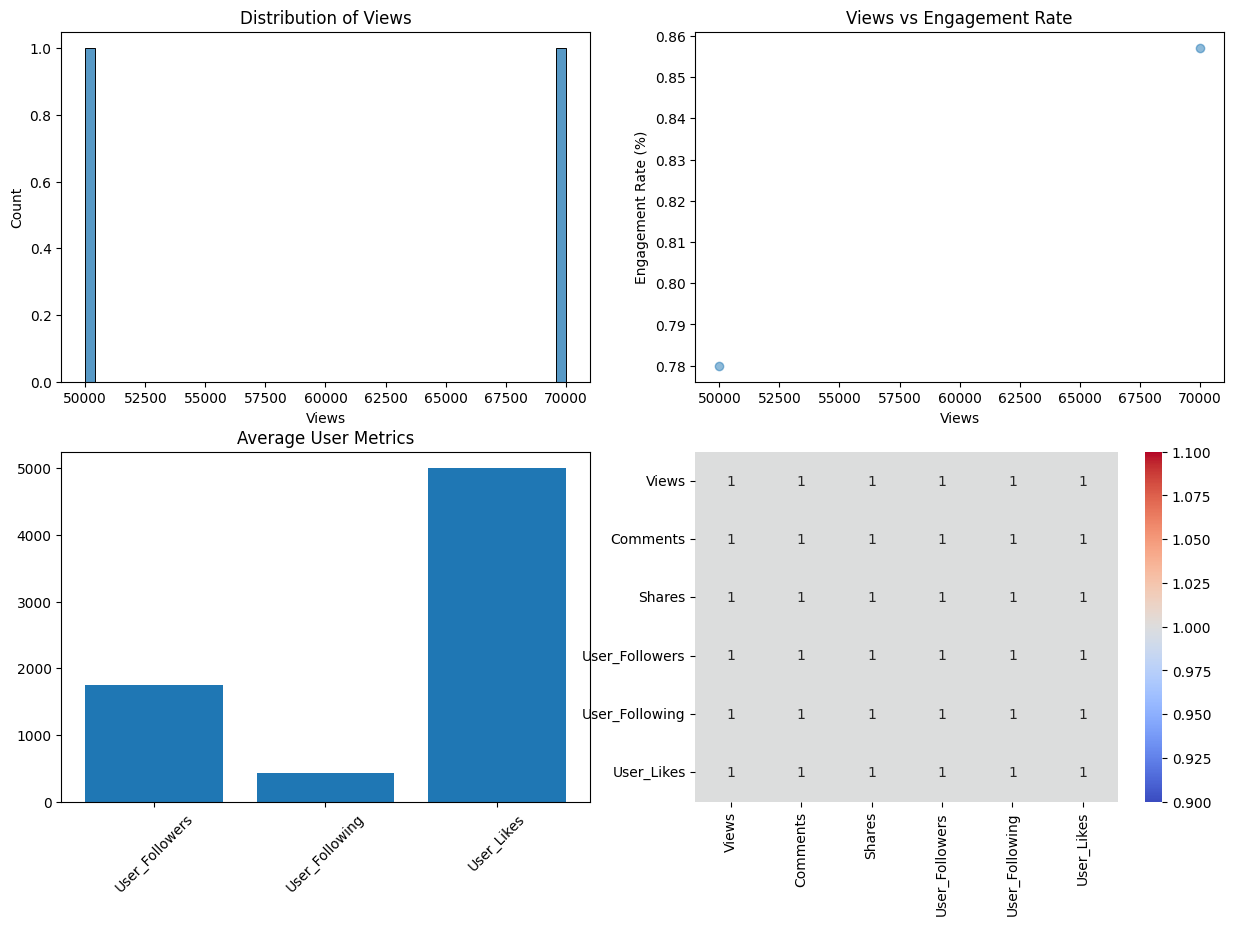

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load and Basic Data Exploration
print("--- Data Loading and Basic Exploration ---")
df = pd.read_csv('test_features.csv')

# Drop Video_Length column
df = df.drop('Video_Length', axis=1)

print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nBasic Statistics:")
print(df.describe())

# 2. Data Cleaning
print("\n--- Data Cleaning ---")
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Remove any duplicates
df = df.drop_duplicates()
print("\nShape after removing duplicates:", df.shape)

# 3. Basic NumPy Operations
print("\n--- Basic NumPy Operations ---")

# Convert to numpy arrays
views_array = np.array(df['Views'])
comments_array = np.array(df['Comments'])
shares_array = np.array(df['Shares'])

print("\nViews Statistics:")
print(f"Mean views: {np.mean(views_array):.2f}")
print(f"Median views: {np.median(views_array):.2f}")
print(f"Std deviation views: {np.std(views_array):.2f}")

# 4. Feature Engineering
print("\n--- Feature Engineering ---")

# Calculate engagement rate
df['Engagement_Rate'] = ((df['Comments'] + df['Shares']) / df['Views']) * 100

# Calculate follower-to-following ratio
df['Follower_Following_Ratio'] = df['User_Followers'] / df['User_Following']

print("\nNew Features Statistics:")
print(df[['Engagement_Rate', 'Follower_Following_Ratio']].describe())

# 5. Advanced Analysis
print("\n--- Advanced Analysis ---")

# Correlation analysis
correlation_matrix = df[['Views', 'Comments', 'Shares',
                        'User_Followers', 'User_Following', 'User_Likes']].corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)

# 6. Performance Categories
print("\n--- Performance Categories ---")

# Categorize videos based on views
df['Performance_Category'] = pd.qcut(df['Views'],
                                   q=4,
                                   labels=['Low', 'Medium', 'High', 'Viral'])

performance_stats = df.groupby('Performance_Category').agg({
    'Views': 'mean',
    'Comments': 'mean',
    'Shares': 'mean',
    'Engagement_Rate': 'mean'
}).round(2)

print("\nPerformance Categories Statistics:")
print(performance_stats)

# 7. Visualizations
print("\n--- Creating Visualizations ---")

plt.figure(figsize=(15, 10))

# Plot 1: Views Distribution
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='Views', bins=50)
plt.title('Distribution of Views')
plt.xlabel('Views')
plt.ylabel('Count')

# Plot 2: Engagement Rate vs Views
plt.subplot(2, 2, 2)
plt.scatter(df['Views'], df['Engagement_Rate'], alpha=0.5)
plt.title('Views vs Engagement Rate')
plt.xlabel('Views')
plt.ylabel('Engagement Rate (%)')

# Plot 3: User Metrics Comparison
plt.subplot(2, 2, 3)
user_metrics = df[['User_Followers', 'User_Following', 'User_Likes']].mean()
plt.bar(user_metrics.index, user_metrics.values)
plt.title('Average User Metrics')
plt.xticks(rotation=45)

# Plot 4: Correlation Heatmap
plt.subplot(2, 2, 4)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

<ipython-input-10-94b49c83bfd2>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
<ipython-input-10-94b49c83bfd2>:53: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, 5)


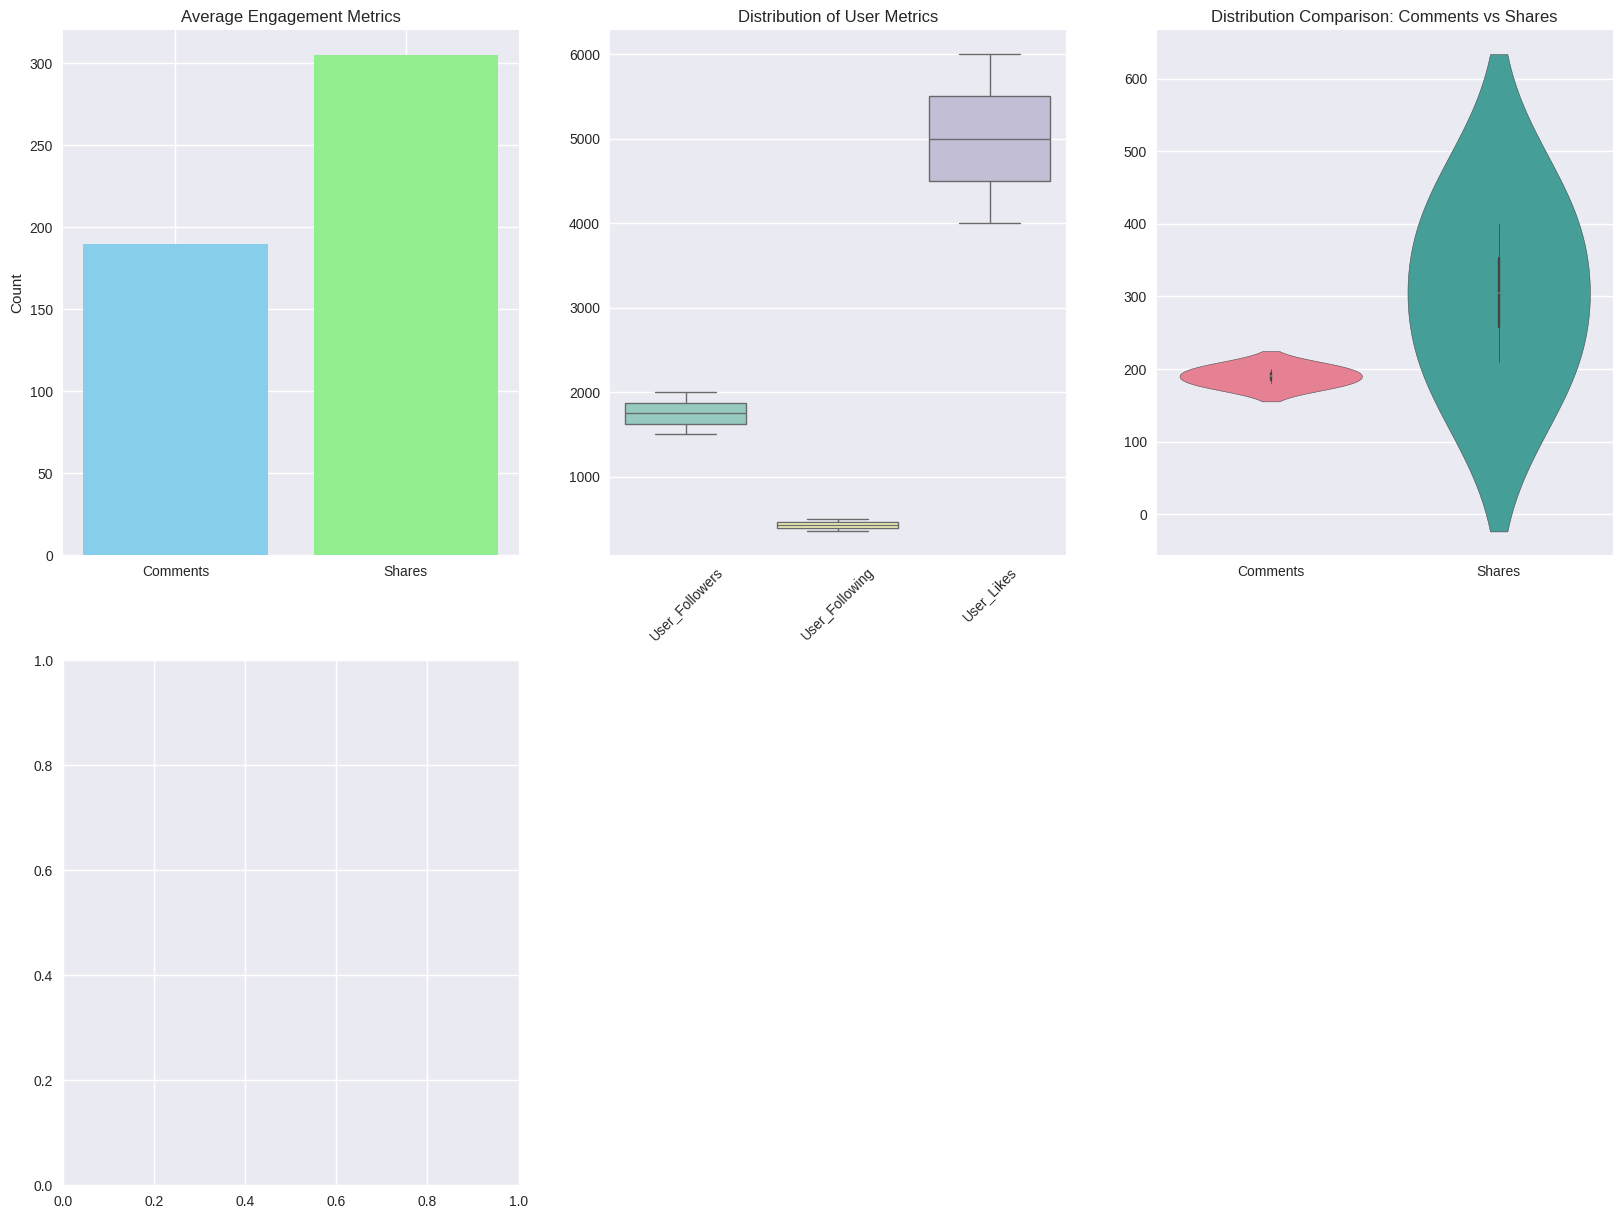

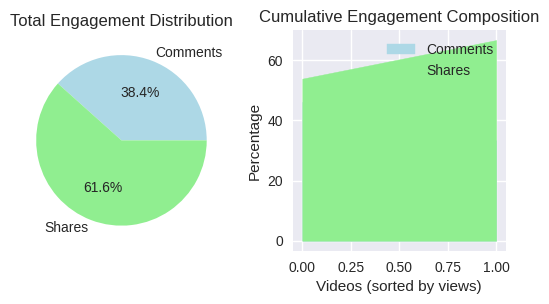

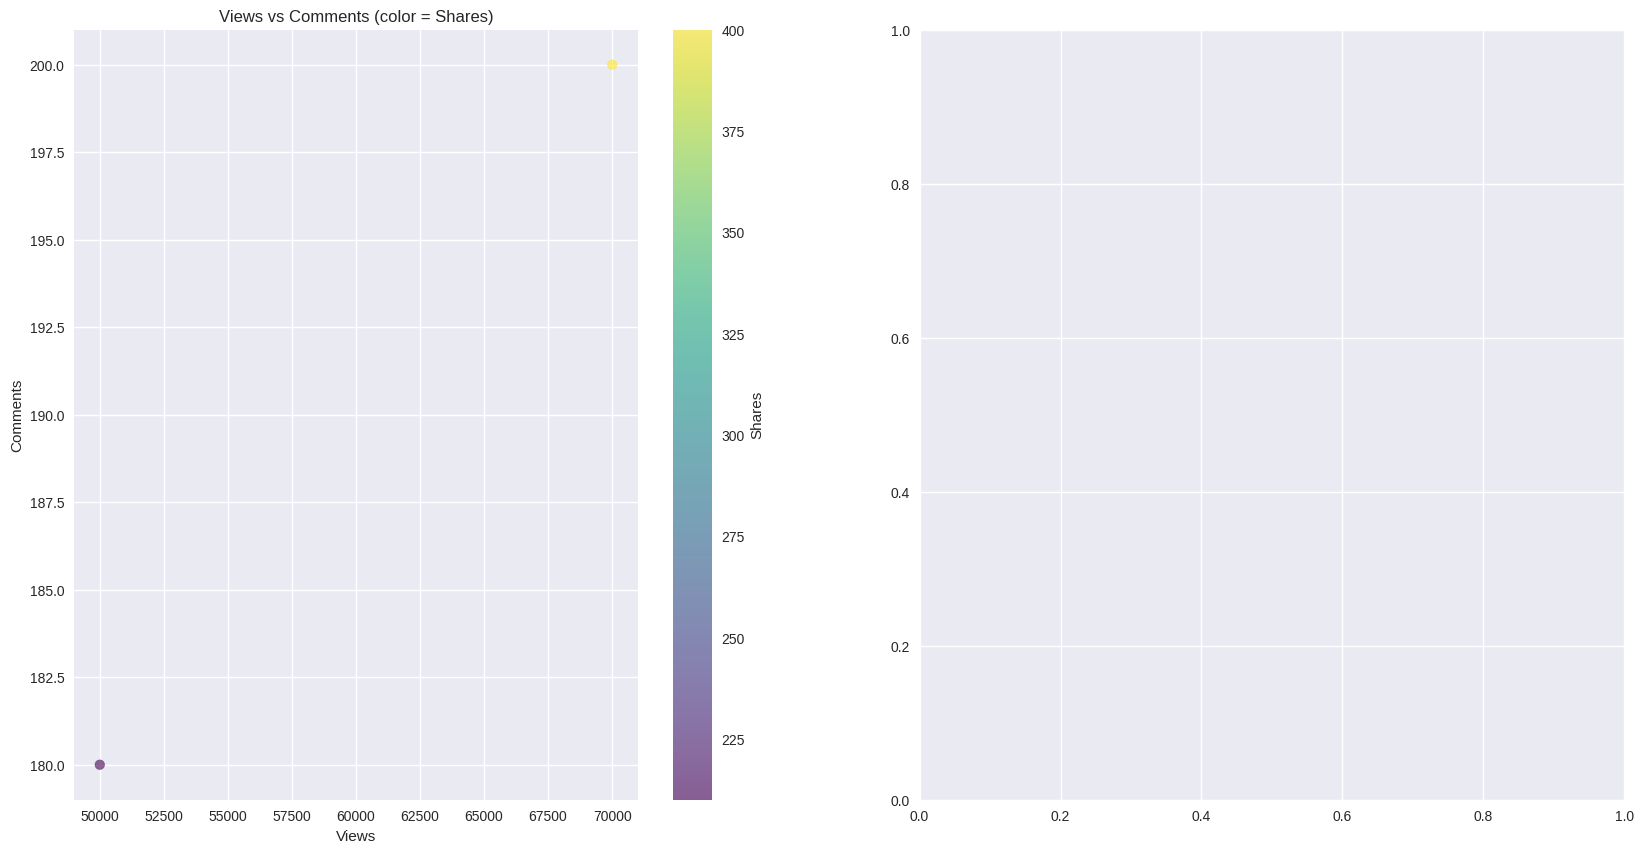

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('test_features.csv')

# Setting the style for better visualization
plt.style.use('seaborn')

# 1. COMPARISON PLOTS
plt.figure(figsize=(20, 15))

# Bar Plot: Comparing Average Engagement Metrics
plt.subplot(2, 3, 1)
metrics = ['Comments', 'Shares']
avg_metrics = [df[metric].mean() for metric in metrics]
plt.bar(metrics, avg_metrics, color=['skyblue', 'lightgreen'])
plt.title('Average Engagement Metrics')
plt.ylabel('Count')

# Box Plot: Distribution of User Metrics
plt.subplot(2, 3, 2)
user_metrics = df[['User_Followers', 'User_Following', 'User_Likes']]
sns.boxplot(data=user_metrics, palette='Set3')
plt.title('Distribution of User Metrics')
plt.xticks(rotation=45)

# Violin Plot: Comparing Distributions
plt.subplot(2, 3, 3)
sns.violinplot(data=df[['Comments', 'Shares']], palette='husl')
plt.title('Distribution Comparison: Comments vs Shares')

# 2. COMPOSITION PLOTS
# Calculate percentages for composition analysis
total_engagement = df['Comments'] + df['Shares']
df['Comments_Pct'] = (df['Comments'] / total_engagement) * 100
df['Shares_Pct'] = (df['Shares'] / total_engagement) * 100

# Stacked Bar Chart
plt.subplot(2, 3, 4)
engagement_composition = pd.DataFrame({
    'Comments': [df['Comments_Pct'].mean()],
    'Shares': [df['Shares_Pct'].mean()]
})
engagement_composition.plot(kind='bar', stacked=True, color=['lightblue', 'lightgreen'])
plt.title('Composition of Engagement')
plt.xlabel('Engagement Type')
plt.ylabel('Percentage')

# Pie Chart
plt.subplot(2, 3, 5)
plt.pie([df['Comments'].sum(), df['Shares'].sum()],
        labels=['Comments', 'Shares'],
        autopct='%1.1f%%',
        colors=['lightblue', 'lightgreen'])
plt.title('Total Engagement Distribution')

# Area Plot: Cumulative Composition
plt.subplot(2, 3, 6)
df_sorted = df.sort_values('Views').reset_index()
plt.fill_between(range(len(df)),
                 df_sorted['Comments_Pct'],
                 color='lightblue',
                 label='Comments')
plt.fill_between(range(len(df)),
                 df_sorted['Shares_Pct'],
                 color='lightgreen',
                 label='Shares')
plt.title('Cumulative Engagement Composition')
plt.xlabel('Videos (sorted by views)')
plt.ylabel('Percentage')
plt.legend()

plt.tight_layout()
plt.show()

# 3. ADDITIONAL COMPARISON PLOTS
plt.figure(figsize=(20, 10))

# Scatter Plot: Views vs Comments with color-coded Shares
plt.subplot(1, 2, 1)
plt.scatter(df['Views'], df['Comments'],
           c=df['Shares'],
           cmap='viridis',
           alpha=0.6)
plt.colorbar(label='Shares')
plt.title('Views vs Comments (color = Shares)')
plt.xlabel('Views')
plt.ylabel('Comments')

# Grouped Bar Plot: User Metrics Comparison
plt.subplot(1, 2, 2)
user_metrics_mean = df[['User_Followers', 'User_Following', 'User_Likes']].mean()
user_metrics_median = df[['User_Followers', 'User_Following']]

<ipython-input-12-b6ad23ea28ef>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


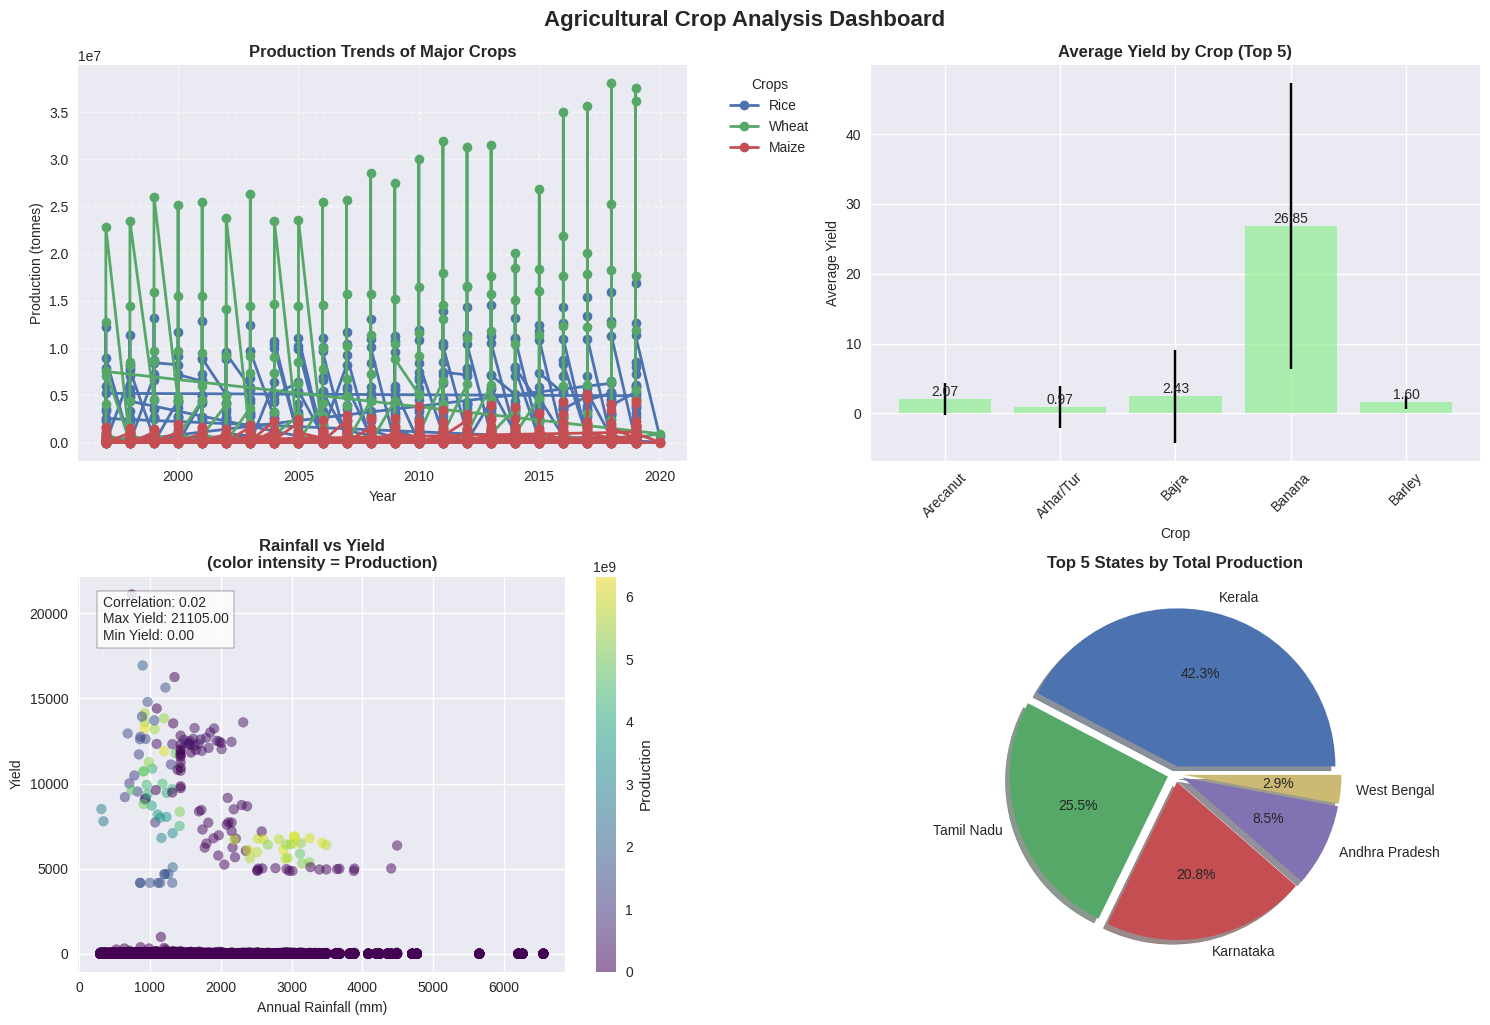

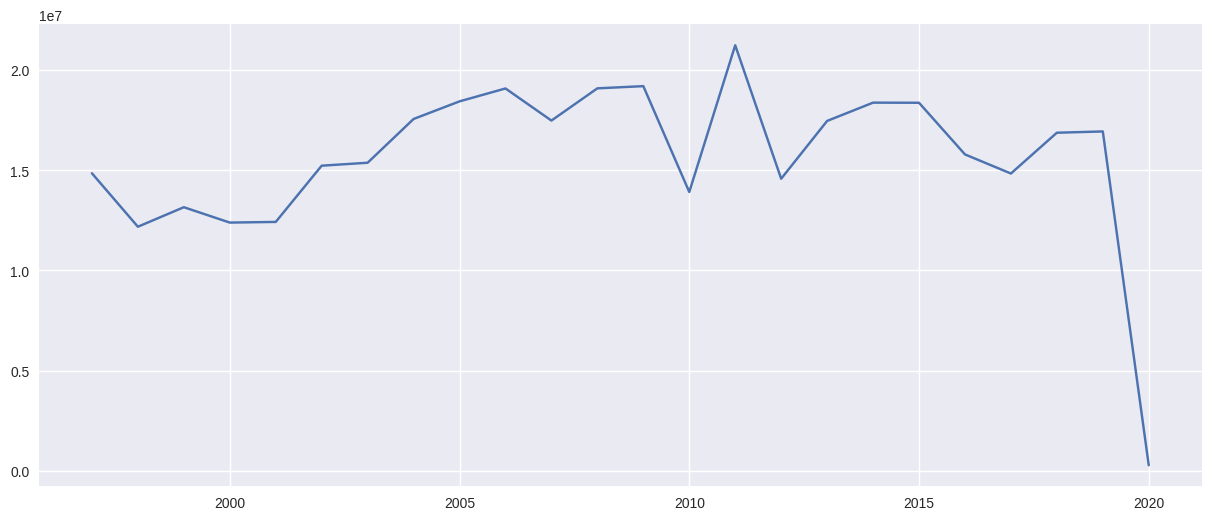

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Read the dataset
df = pd.read_csv('crop_yield.csv')

# Set the style
plt.style.use('seaborn')

# 1. Basic Line Plot with Multiple Lines
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
crops = ['Rice', 'Wheat', 'Maize']
for crop in crops:
    crop_data = df[df['Crop'] == crop]
    plt.plot(crop_data['Crop_Year'], crop_data['Production'],
            label=crop, marker='o', linewidth=2)

plt.title('Production Trends of Major Crops', fontsize=12, fontweight='bold')
plt.xlabel('Year', fontsize=10)
plt.ylabel('Production (tonnes)', fontsize=10)
plt.legend(title='Crops', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)

# 2. Bar Plot with Error Bars
plt.subplot(2, 2, 2)
crop_means = df.groupby('Crop')['Yield'].mean()
crop_std = df.groupby('Crop')['Yield'].std()

plt.bar(crop_means.index[:5], crop_means[:5],
        yerr=crop_std[:5],
        capsize=5,
        alpha=0.7,
        color='lightgreen')

plt.title('Average Yield by Crop (Top 5)', fontsize=12, fontweight='bold')
plt.xlabel('Crop', fontsize=10)
plt.ylabel('Average Yield', fontsize=10)
plt.xticks(rotation=45)

# Add value labels on bars
for i, v in enumerate(crop_means[:5]):
    plt.text(i, v, f'{v:.2f}',
             ha='center', va='bottom')

# 3. Scatter Plot with Text Annotations
plt.subplot(2, 2, 3)
plt.scatter(df['Annual_Rainfall'], df['Yield'],
           alpha=0.5, c=df['Production'],
           cmap='viridis')

plt.title('Rainfall vs Yield\n(color intensity = Production)',
          fontsize=12, fontweight='bold')
plt.xlabel('Annual Rainfall (mm)', fontsize=10)
plt.ylabel('Yield', fontsize=10)

# Add colorbar
plt.colorbar(label='Production')

# Add text box with statistics
stats_text = f'Correlation: {df["Annual_Rainfall"].corr(df["Yield"]):.2f}\n'
stats_text += f'Max Yield: {df["Yield"].max():.2f}\n'
stats_text += f'Min Yield: {df["Yield"].min():.2f}'

plt.text(0.05, 0.95, stats_text,
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8),
         verticalalignment='top')

# 4. Pie Chart with Legend
plt.subplot(2, 2, 4)
top_states = df.groupby('State')['Production'].sum().nlargest(5)
plt.pie(top_states, labels=top_states.index, autopct='%1.1f%%',
        explode=[0.05]*5, shadow=True)
plt.title('Top 5 States by Total Production', fontsize=12, fontweight='bold')

# Adjust layout
plt.tight_layout()

# Add a main title to the entire figure
plt.suptitle('Agricultural Crop Analysis Dashboard',
             fontsize=16, fontweight='bold', y=1.02)

# 5. Additional Plot: Time Series with Annotations
plt.figure(figsize=(15, 6))

# Calculate average production by year
yearly_prod = df.groupby('Crop_Year')['Production'].mean()
plt.plot(yearly_prod)

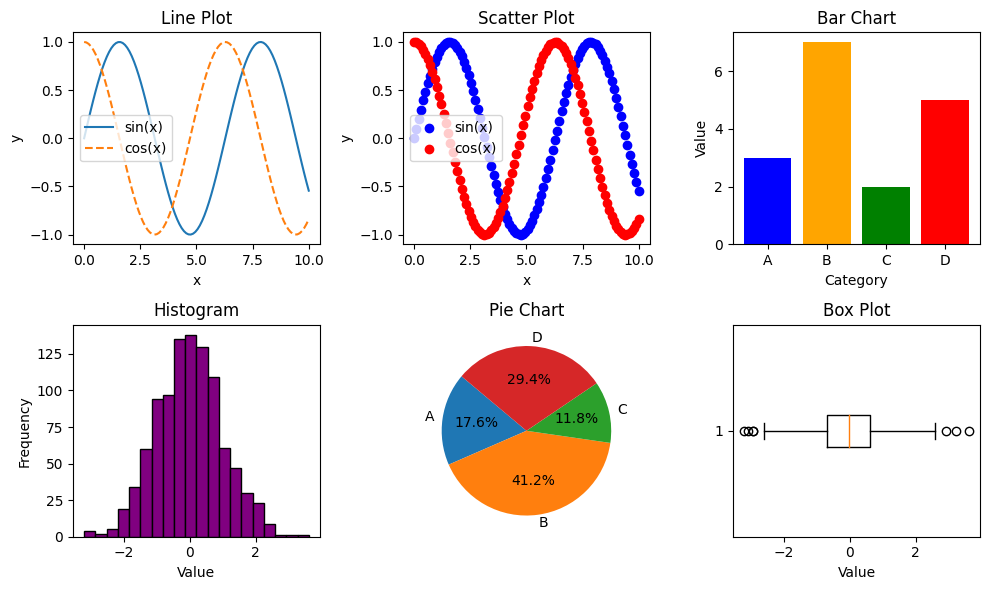

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
x = np.linspace(0, 10, 100)
y = np.sin(x)
y2 = np.cos(x)
categories = ['A', 'B', 'C', 'D']
values = [3, 7, 2, 5]
data = np.random.randn(1000)

# Line Plot
plt.figure(figsize=(10, 6))
plt.subplot(2, 3, 1)
plt.plot(x, y, label='sin(x)')
plt.plot(x, y2, label='cos(x)', linestyle='--')
plt.title('Line Plot')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Scatter Plot
plt.subplot(2, 3, 2)
plt.scatter(x, y, label='sin(x)', color='b')
plt.scatter(x, y2, label='cos(x)', color='r')
plt.title('Scatter Plot')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Bar Plot
plt.subplot(2, 3, 3)
plt.bar(categories, values, color=['blue', 'orange', 'green', 'red'])
plt.title('Bar Chart')
plt.xlabel('Category')
plt.ylabel('Value')

# Histogram
plt.subplot(2, 3, 4)
plt.hist(data, bins=20, color='purple', edgecolor='black')
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Pie Chart
plt.subplot(2, 3, 5)
plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart')

# Box Plot
plt.subplot(2, 3, 6)
plt.boxplot(data, vert=False)
plt.title('Box Plot')
plt.xlabel('Value')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


<ipython-input-2-fe253c2ec929>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Value', data=data, palette='coolwarm')


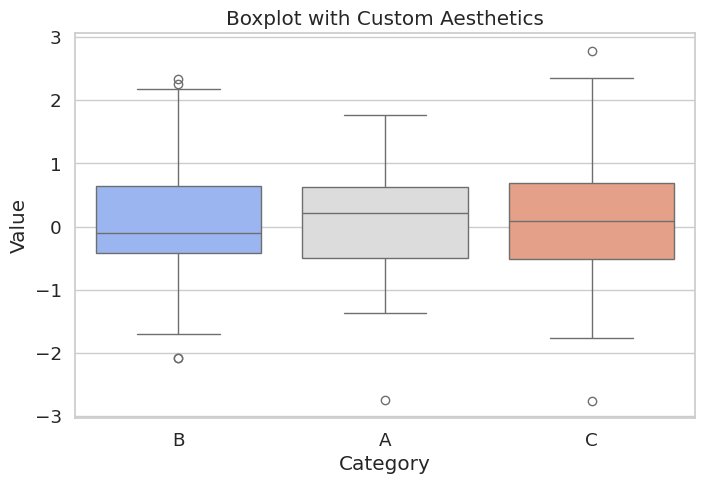

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Generate sample data
np.random.seed(10)
data = pd.DataFrame({
    'Category': np.random.choice(['A', 'B', 'C'], 200),
    'Value': np.random.randn(200)
})

# Set style and context for figure aesthetics
sns.set_style("whitegrid")  # Choose style: whitegrid, darkgrid, dark, white, ticks
sns.set_context("notebook", font_scale=1.2)  # Choose context: paper, notebook, talk, or poster

# Create a boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='Category', y='Value', data=data, palette='coolwarm')
plt.title("Boxplot with Custom Aesthetics")
plt.show()
